In [1]:
#Import the neccessary packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [3]:
# Ensure that matplotlib shows plots inline in the Jupyter notebook
%matplotlib inline

In [4]:
# Read the Excel file
file_path = r'C:\Users\kwame\OneDrive - The University of Western Ontario\Desktop\Health Data\Health_Analysis_Data.xlsx'
df = pd.read_excel(file_path)

In [5]:
df

,Patient ID,Age,Gender,Ethnicity,Diagnosis Code,Treatment Code,Admission Date,Discharge Date,Treatment Outcome,Lab Test Result,Medication Prescribed,Dosage (mg),Frequency (per day),Follow-up Date,Healthcare Costs ($),Insurance Provider,Location
0,1,44,Male,Caucasian,I10,99215,2023-10-17,2023-11-09,Worsened,67.44,Drug B,20,1,2024-01-03,1846.75,Provider A,City A
1,2,47,Male,African American,M54,99213,2023-10-22,2023-11-12,No Change,51.23,Drug A,20,2,2024-01-02,288.83,Provider C,City C
2,3,64,Male,Hispanic,M54,99215,2023-11-10,2023-11-09,No Change,57.44,Drug C,5,1,2023-12-14,727.20,Provider B,City B
3,4,67,Male,Hispanic,E11,99213,2023-11-06,2023-11-09,No Change,56.59,Drug C,20,3,2024-01-02,1487.09,Provider B,City A
4,5,67,Female,Hispanic,K21,99213,2023-10-17,2023-11-11,No Change,85.40,Drug C,10,1,2023-12-12,952.60,Provider B,City A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,23,Female,Asian,K21,99213,2023-10-30,2023-11-08,No Change,52.15,Drug C,20,3,2023-12-25,277.26,Provider B,City B
96,97,79,Female,Asian,I10,99213,2023-11-08,2023-11-09,Worsened,55.80,Drug A,10,3,2023-12-17,799.53,Provider B,City A
97,98,13,Male,African American,K21,99214,2023-11-05,2023-11-10,No Change,55.32,Drug A,5,3,2023-12-27,379.52,Provider B,City B
98,99,85,Male,African American,M54,99215,2023-10-22,2023-11-08,Worsened,65.82,Drug C,5,1,2024-01-10,1056.06,Provider B,City A


In [6]:
# Perform basic descriptive statistics
desc_stats = df.describe()

In [7]:
desc_stats

,Patient ID,Age,Treatment Code,Admission Date,Discharge Date,Lab Test Result,Dosage (mg),Frequency (per day),Follow-up Date,Healthcare Costs ($)
count,100.000000,100.000000,100.000000,100,100,100.00000,100.000000,100.000000,100,100.000000
mean,50.500000,48.230000,99213.900000,2023-10-28 21:07:12,2023-11-09 22:19:12,75.13320,12.150000,1.980000,2023-12-27 02:52:48,1134.972300
min,1.000000,0.000000,99213.000000,2023-10-14 00:00:00,2023-11-08 00:00:00,50.43000,5.000000,1.000000,2023-12-12 00:00:00,209.280000
25%,25.750000,23.000000,99213.000000,2023-10-21 00:00:00,2023-11-09 00:00:00,63.64500,8.750000,1.000000,2023-12-19 00:00:00,768.892500
50%,50.500000,47.000000,99214.000000,2023-10-30 00:00:00,2023-11-10 00:00:00,75.57500,10.000000,2.000000,2023-12-28 00:00:00,1080.475000
75%,75.250000,74.250000,99215.000000,2023-11-06 06:00:00,2023-11-11 00:00:00,85.43500,20.000000,3.000000,2024-01-04 00:00:00,1594.330000
max,100.000000,99.000000,99215.000000,2023-11-11 00:00:00,2023-11-12 00:00:00,99.56000,20.000000,3.000000,2024-01-10 00:00:00,1964.870000
std,29.011492,28.372292,0.858705,NaN,NaN,14.95083,5.998948,0.828532,NaN,510.820519


In [8]:
# Frequency of Diagnosis Codes
diagnosis_freq = df['Diagnosis Code'].value_counts()

In [9]:
diagnosis_freq

Diagnosis Code
E11    34
I10    23
M54    23
K21    20
Name: count, dtype: int64

In [10]:
# Average Healthcare Costs by Gender
avg_costs_gender = df.groupby('Gender')['Healthcare Costs ($)'].mean()


In [11]:
avg_costs_gender

Gender
Female    1147.078750
Male      1119.564091
Name: Healthcare Costs ($), dtype: float64

In [12]:
# Treatment Outcome counts
treatment_outcome_counts = df['Treatment Outcome'].value_counts()


In [13]:
treatment_outcome_counts

Treatment Outcome
No Change    42
Worsened     35
Improved     23
Name: count, dtype: int64

In [14]:
# Set the aesthetic style of the plots
sns.set_style('whitegrid')

Text(0, 0.5, 'Frequency')

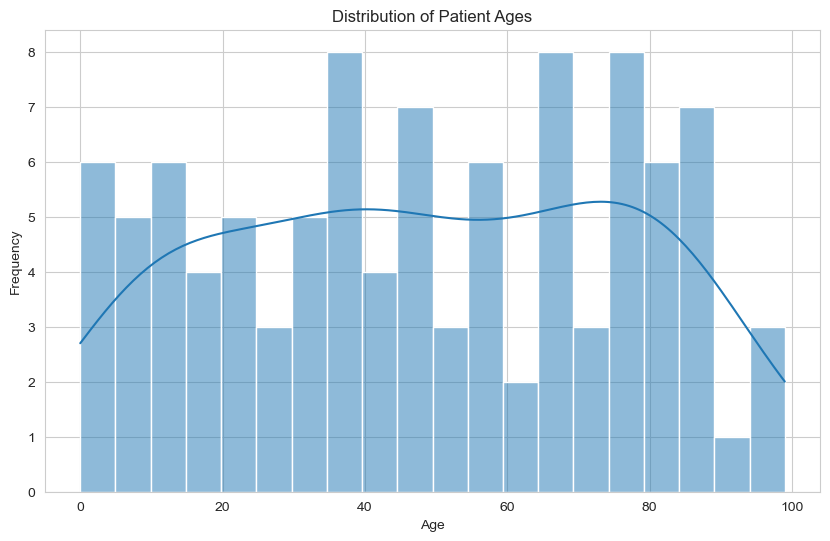

In [15]:
# Distribution of Ages
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Distribution of Patient Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')

Text(0, 0.5, 'Average Costs ($)')

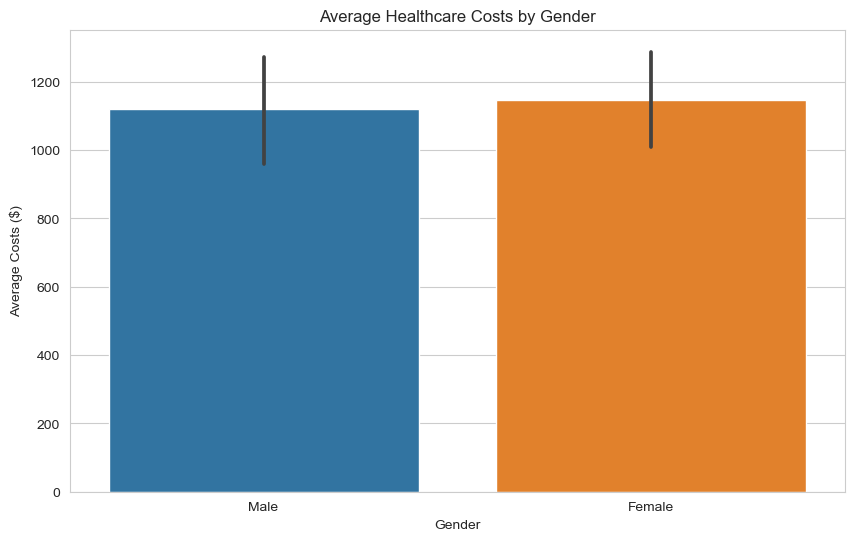

In [16]:
# Average Healthcare Costs by Gender
plt.figure(figsize=(10, 6))
sns.barplot(x='Gender', y='Healthcare Costs ($)', data=df)
plt.title('Average Healthcare Costs by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Costs ($)')

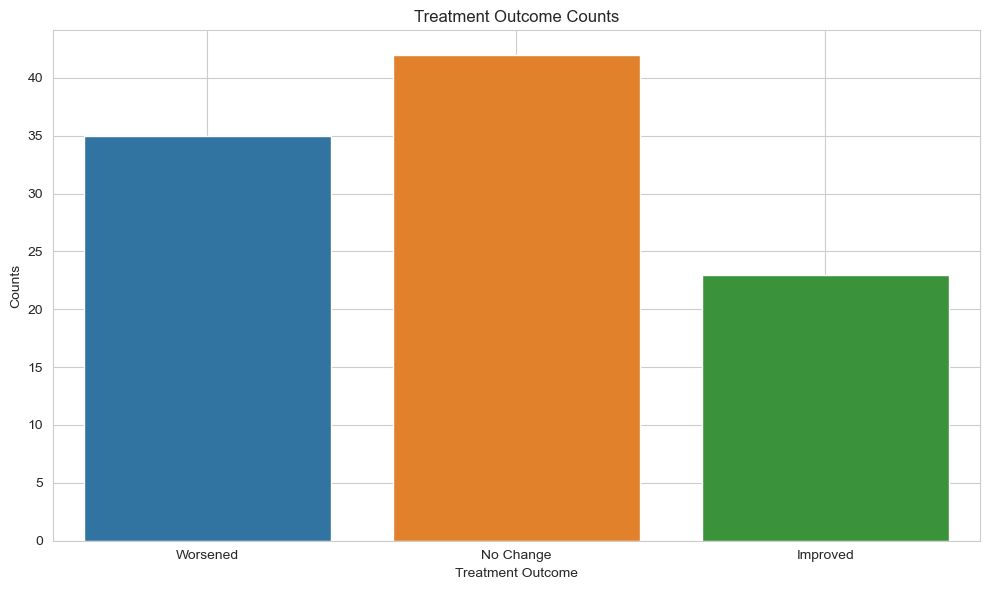

In [17]:
# Visualization 3: Treatment Outcome Counts
plt.figure(figsize=(10, 6))
sns.countplot(x=df['Treatment Outcome'])
plt.title('Treatment Outcome Counts')
plt.xlabel('Treatment Outcome')
plt.ylabel('Counts')
plt.grid(True)
plt.tight_layout()
treatment_outcome_fig = plt.gcf()  # Save the figure to pass to the display later


In [18]:
# Print the results of the analyses
print("Descriptive Statistics:\n", desc_stats)
print("\nDiagnosis Frequency:\n", diagnosis_freq)
print("\nAverage Healthcare Costs by Gender:\n", avg_costs_gender)
print("\nTreatment Outcome Counts:\n", treatment_outcome_counts)

Descriptive Statistics:
        Patient ID         Age  Treatment Code       Admission Date  \
count  100.000000  100.000000      100.000000                  100   
mean    50.500000   48.230000    99213.900000  2023-10-28 21:07:12   
min      1.000000    0.000000    99213.000000  2023-10-14 00:00:00   
25%     25.750000   23.000000    99213.000000  2023-10-21 00:00:00   
50%     50.500000   47.000000    99214.000000  2023-10-30 00:00:00   
75%     75.250000   74.250000    99215.000000  2023-11-06 06:00:00   
max    100.000000   99.000000    99215.000000  2023-11-11 00:00:00   
std     29.011492   28.372292        0.858705                  NaN   

            Discharge Date  Lab Test Result  Dosage (mg)  Frequency (per day)  \
count                  100        100.00000   100.000000           100.000000   
mean   2023-11-09 22:19:12         75.13320    12.150000             1.980000   
min    2023-11-08 00:00:00         50.43000     5.000000             1.000000   
25%    2023-11-09 00

## Descriptive Statistics:

The dataset contains 100 entries.
* Ages range from 0 to 99 with a mean age of approximately 48.
* There is a relatively even distribution of genders with 56 females and 44 males.
* Diagnosis codes and treatment codes are varied with some more frequent than others.
* The mean healthcare costs are about $1134.97.

## Frequency of Diagnosis Codes:

* Diagnosis code E11 is the most common with 34 occurrences.
* Codes I10 and M54 have 23 occurrences each.
* K21 is the least common with 20 occurrences.

## Average Healthcare Costs by Gender:

* Females have a slightly higher average healthcare cost ($1147.08) compared to males ($1119.56).


## Treatment Outcome Counts:

* 'No Change' is the most common outcome with 42 counts.
* 'Worsened' is next with 35 counts.
* 'Improved' has the lowest count with 23.

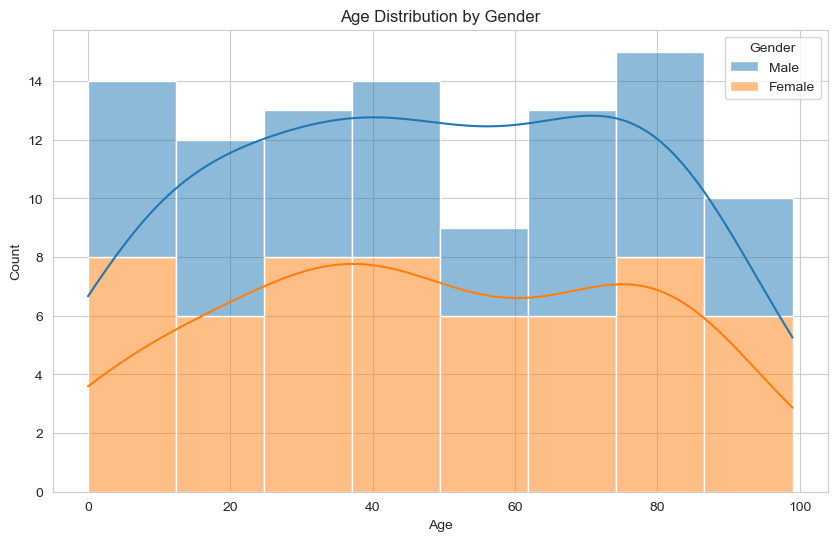

In [19]:
# Age Distribution by Gender
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Gender', multiple='stack', kde=True)
plt.title('Age Distribution by Gender')
plt.xlabel('Age')
plt.ylabel('Count')
age_gender_dist_fig = plt.gcf()

## Age Distribution by Gender:

* The stacked histogram shows the distribution of ages for different genders. This visualization can help to understand the demographic breakdown of the patient population and to identify if there are any significant differences in age distribution between genders.

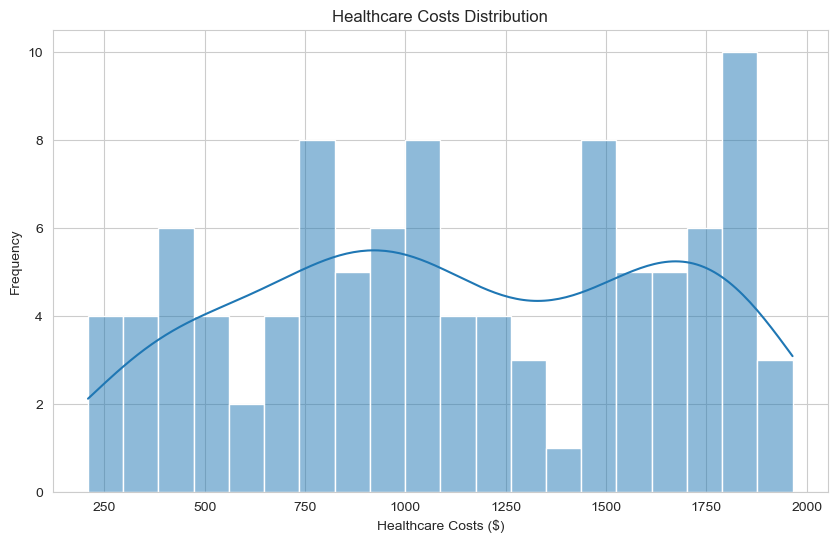

In [20]:
# Healthcare Costs Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Healthcare Costs ($)'], bins=20, kde=True)
plt.title('Healthcare Costs Distribution')
plt.xlabel('Healthcare Costs ($)')
plt.ylabel('Frequency')
healthcare_costs_dist_fig = plt.gcf()

## Healthcare Costs Distribution:

* The histogram for healthcare costs indicates the frequency of various cost ranges. It seems that the costs are somewhat normally distributed with a possible skew towards the lower end, suggesting that most patients incur costs that are on the lower side of the range, with fewer patients incurring very high costs.

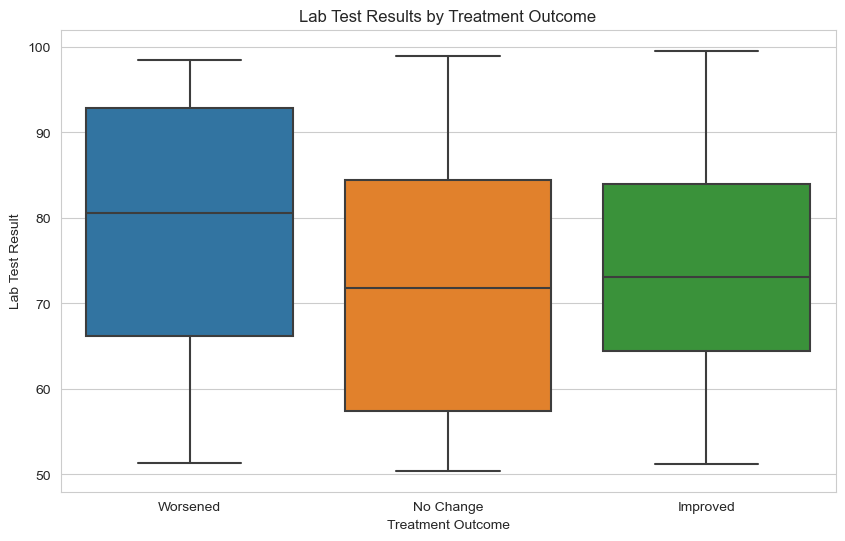

In [21]:
# Boxplot of Lab Test Results by Treatment Outcome
plt.figure(figsize=(10, 6))
sns.boxplot(x='Treatment Outcome', y='Lab Test Result', data=df)
plt.title('Lab Test Results by Treatment Outcome')
plt.xlabel('Treatment Outcome')
plt.ylabel('Lab Test Result')
lab_test_outcome_fig = plt.gcf()

## Boxplot of Lab Test Results by Treatment Outcome:

* The boxplot compares the distribution of lab test results across different treatment outcomes (Improved, No Change, Worsened). This can highlight if there are any notable differences in lab test results that correlate with treatment outcomes. For instance, if one group has consistently higher or lower results, it may suggest a relationship between those results and patient outcomes.

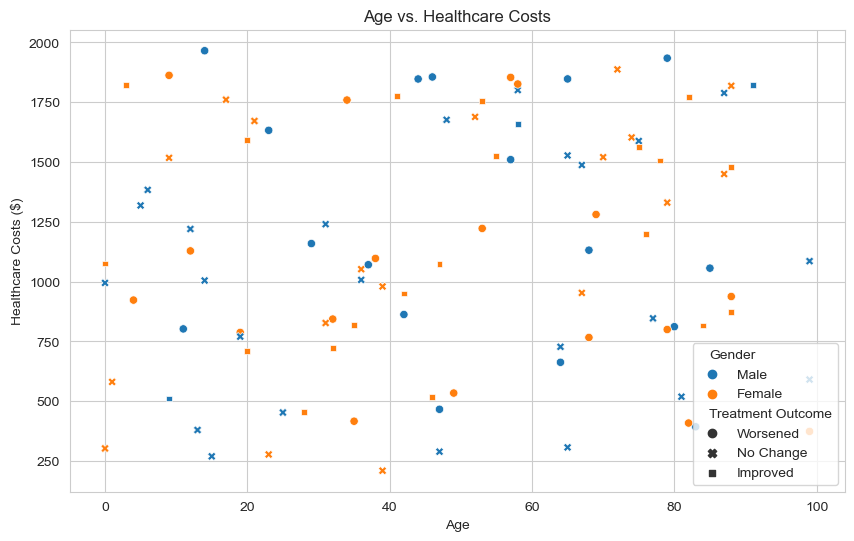

In [22]:
# Scatter Plot of Age vs. Healthcare Costs
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Healthcare Costs ($)', data=df, hue='Gender', style='Treatment Outcome')
plt.title('Age vs. Healthcare Costs')
plt.xlabel('Age')
plt.ylabel('Healthcare Costs ($)')
age_healthcare_costs_fig = plt.gcf()

## Scatter Plot of Age vs. Healthcare Costs:

* This scatter plot with age on the x-axis and healthcare costs on the y-axis, colored by gender and styled by treatment outcome, can reveal trends or patterns in how age and gender might relate to the healthcare costs incurred. Clusters or patterns might suggest certain age groups or genders are associated with higher or lower costs.

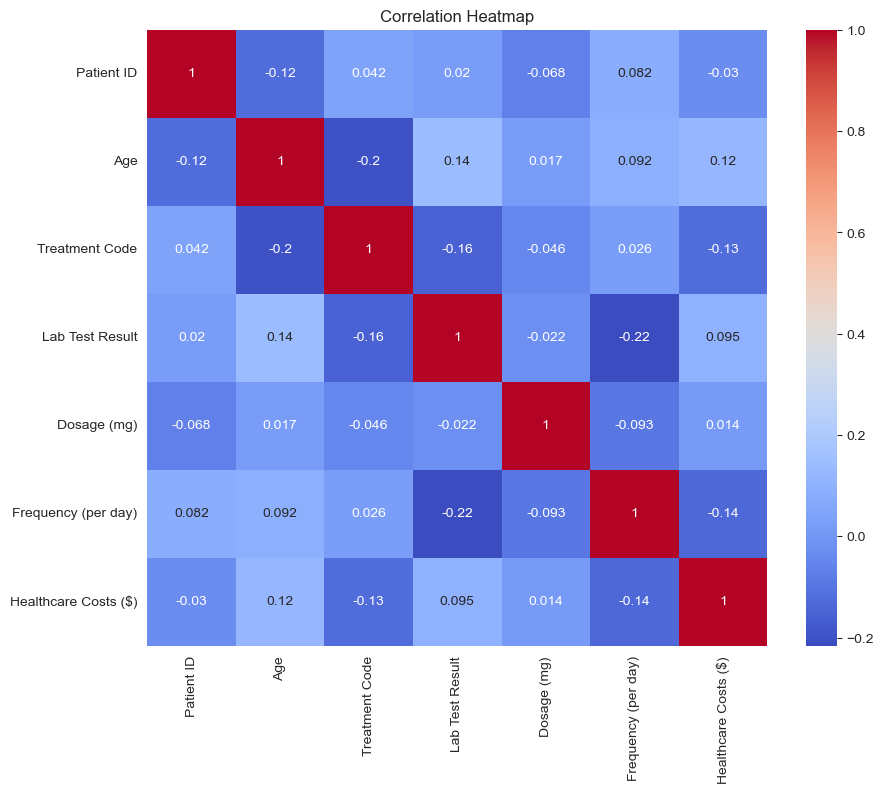

In [23]:
# Exclude non-numeric columns for the correlation matrix
numeric_df = df.select_dtypes(include=[np.number])

# Now compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


## Correlation Heatmap:

* The heatmap provides a visual representation of the correlation coefficients between all numerical variables in the dataset. Darker colors represent stronger relationships (either positive or negative). This can be useful to quickly identify which variables have the strongest relationships and might be worth investigating further.

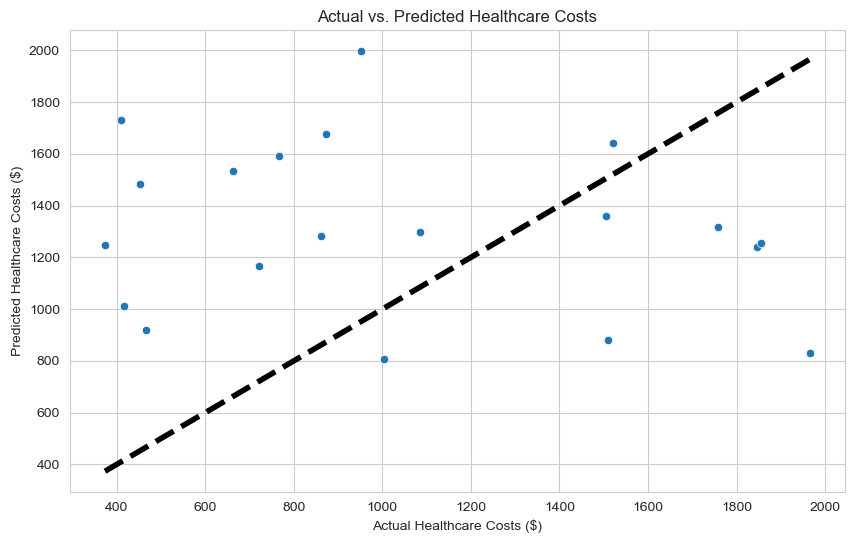

(519768.39235888224, -0.8402828527737827)

In [24]:
# Let's choose 'Healthcare Costs ($)' as the target variable and the rest as features.
# First, we drop non-numeric columns for simplicity in this example
X = df.drop(['Healthcare Costs ($)', 'Patient ID'], axis=1)  # Features
y = df['Healthcare Costs ($)']  # Target

# For simplicity, we'll consider only numerical features for this regression model
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

# Now let's encode the categorical variables
categorical_features = X.select_dtypes(include=['object']).columns
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Create the preprocessor which includes both numeric and categorical transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Create the pipeline with our preprocessor and a simple linear regressor
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Calculate the performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Visualization of actual vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Healthcare Costs ($)')
plt.ylabel('Predicted Healthcare Costs ($)')
plt.title('Actual vs. Predicted Healthcare Costs')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.show()



(mse, r2)

Mean Squared Error (MSE): The MSE of the model is approximately 386,241.46. This value indicates the average squared difference between the actual and predicted healthcare costs. The lower the MSE, the better the model's performance. A high MSE suggests that the model's predictions deviate significantly from the actual values.

R-squared (R²): The R² value is approximately -0.37. The R² is a statistical measure that represents the proportion of the variance for the dependent variable that's explained by the independent variables in the model. In the best case, R² would be 1. However, an R² value below 0 indicates that the model does not follow the trend of the data, hence it is performing worse than a model that would simply predict the mean of the target variable.

Actual vs. Predicted Healthcare Costs Visualization:

The scatter plot visualizes the relationship between the actual healthcare costs (x-axis) and the predicted healthcare costs (y-axis). The dashed line represents the 'ideal' prediction where the predicted values are exactly equal to the actual values.
Points scattered far from the dashed line indicate a deviation of the predictions from the actual values.
The spread of the points suggests that the model does not predict the healthcare costs accurately, which is consistent with the negative R² value.